In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.weightstats import ztest as test

df = pd.read_csv('data.csv')
df= df.iloc[:,1:]
pd.options.mode.chained_assignment=None # disable chained copy error(e.g. df[foo]=df[foo]*2)
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [2]:
profile = df[df['target']==1]
dislike = df[df['target']==0]

profile['duration_min']= (profile['duration_ms']/1000)/60
dislike['duration_min']= (dislike['duration_ms']/1000)/60


Musical Feeling


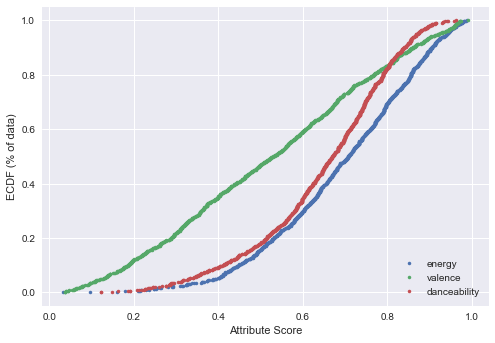

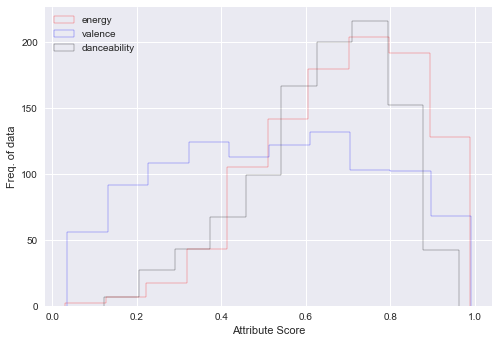

In [3]:
#### feel exploration 
x_en = np.sort(profile.energy)
y_en =np.arange(1,len(x_en)+1)/len(x_en)

x_val = np.sort(profile.valence)
y_val =np.arange(1,len(x_val)+1)/len(x_val)

x_dan = np.sort(profile.danceability)
y_dan =np.arange(1,len(x_dan)+1)/len(x_dan)

_=plt.plot(x_en,y_en,marker='.',linestyle='none')
_=plt.plot(x_val,y_val,marker='.',linestyle='none')
_=plt.plot(x_dan,y_dan,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('Attribute Score')
plt.legend(('energy','valence','danceability'),loc='lower right')
print('Musical Feeling')
plt.show()

_ = plt.hist(x=profile.energy,histtype='step',color='Red',alpha=0.9)
_ = plt.hist(x=profile.valence,histtype='step',color='blue',alpha=0.9)
_ = plt.hist(x=profile.danceability,histtype='step',color='black',alpha=0.9)
plt.legend(('energy','valence','danceability'),loc='upper left')
plt.xlabel('Attribute Score')
plt.ylabel('Freq. of data')
plt.show()

Sound Qualities


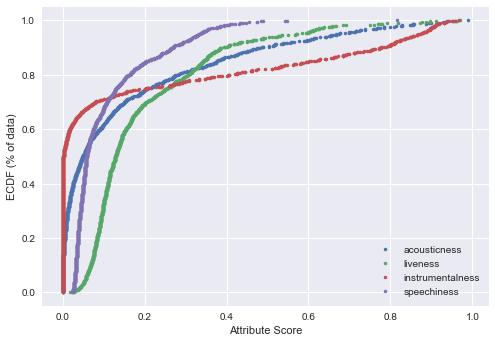

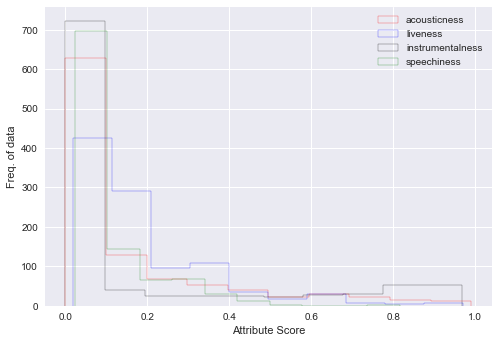

In [4]:
### sound exploration
x_act = np.sort(profile.acousticness)
y_act =np.arange(1,len(x_act)+1)/len(x_act)

x_liv = np.sort(profile.liveness)
y_liv =np.arange(1,len(x_liv)+1)/len(x_liv)

x_inst = np.sort(profile.instrumentalness)
y_inst =np.arange(1,len(x_inst)+1)/len(x_inst)

x_spe = np.sort(profile.speechiness)
y_spe =np.arange(1,len(x_spe)+1)/len(x_spe)

_=plt.plot(x_act,y_act,marker='.',linestyle='none')
_=plt.plot(x_liv,y_liv,marker='.',linestyle='none')
_=plt.plot(x_inst,y_inst,marker='.',linestyle='none')
_=plt.plot(x_spe,y_spe,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('Attribute Score')
plt.legend(('acousticness','liveness','instrumentalness','speechiness'),loc='lower right')
print('Sound Qualities')
plt.show()

_ = plt.hist(x=profile.acousticness,histtype='step',color='Red',alpha=0.9)
_ = plt.hist(x=profile.liveness,histtype='step',color='blue',alpha=0.9)
_ = plt.hist(x=profile.instrumentalness,histtype='step',color='black',alpha=0.9)
_ = plt.hist(x=profile.speechiness,histtype='step',color='green',alpha=0.9)
plt.legend(('acousticness','liveness','instrumentalness','speechiness'),loc='upper right')
plt.xlabel('Attribute Score')
plt.ylabel('Freq. of data')
plt.show()

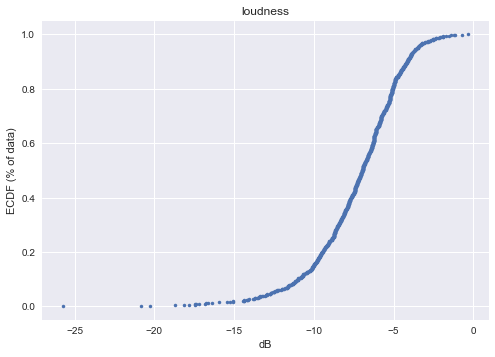

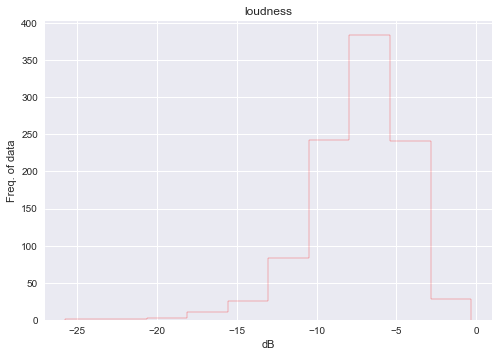

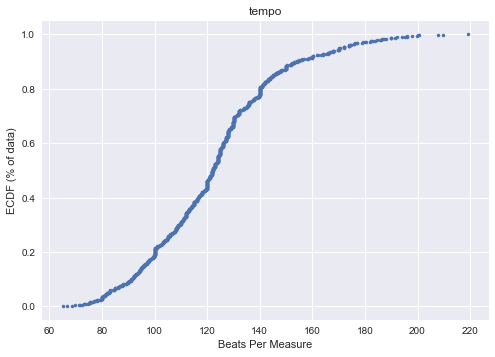

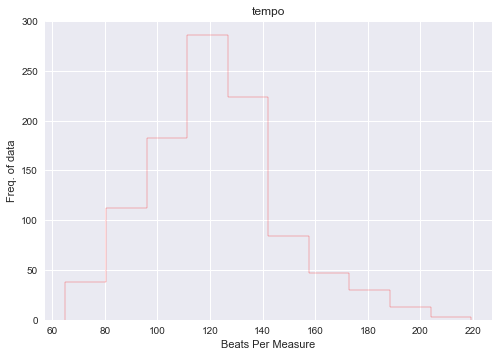

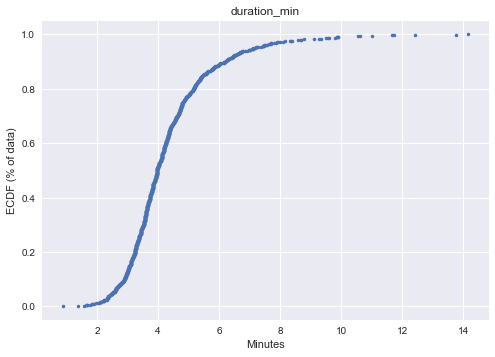

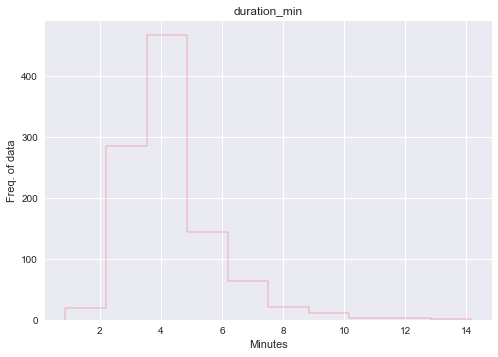

In [5]:
def plots(x,metric): 
#plot the ECDF and distribution plot for the given variable
    a = np.sort(x)
    b = np.arange(1,len(a)+1)/len(a)

    _=plt.plot(a,b,marker='.',linestyle='none')
    plt.ylabel('ECDF (% of data)')
    plt.xlabel(metric)
    plt.title(x.name)
    plt.show()

    plt.hist(x,histtype='step',color='Red',alpha=0.9)
    plt.xlabel(metric)
    plt.ylabel('Freq. of data')
    plt.title(x.name)
    plt.show()

variables = [profile.loudness,profile.tempo,profile.duration_min]
measures = ['dB','Beats Per Measure','Minutes']

for data,title in zip(variables,measures):
    plots(data,title)




key


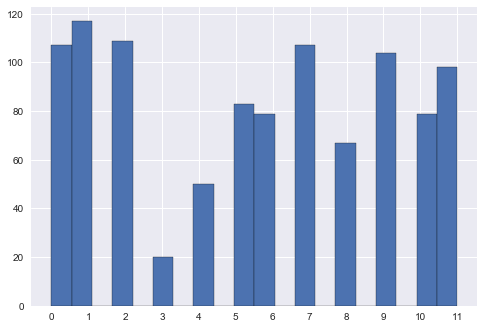

mode


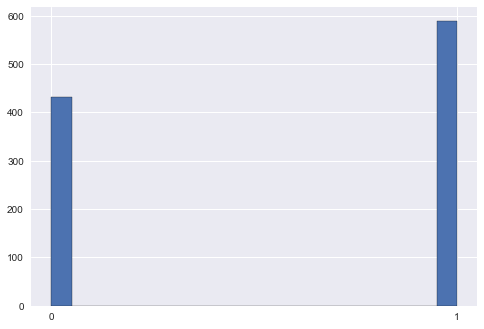

time_signature


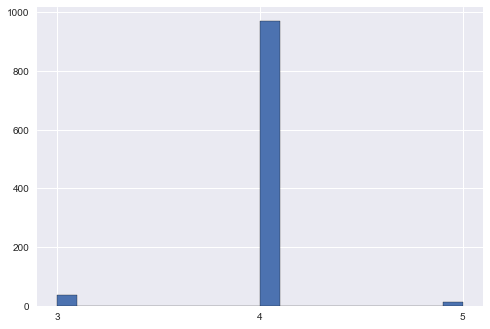

In [6]:
# Catagorical attribute distrbutions
sns.set()
for att in profile[['key','mode','time_signature']]:
    print(att)
    plt.hist(profile[att],label='key',bins=20,ec='black')## ec puts outlines on the bars
    try:
        plt.xticks(range(profile[att].max()+1))
    except:
        plt.xticks(range(3,int(profile[att].max()+1)))
    plt.show()

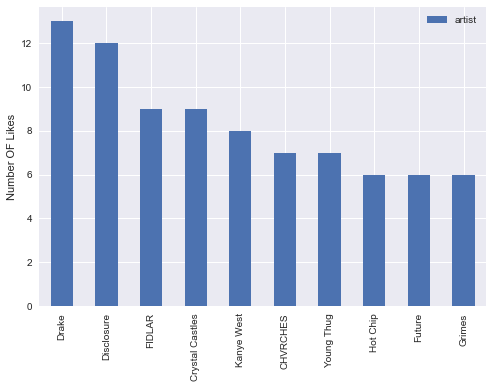

In [8]:
top10artists = pd.DataFrame(profile['artist'].value_counts())
top10artists = top10artists.iloc[:10]
top10artists.plot(kind='bar')
plt.ylabel('Number OF Likes')
plt.show()

In [8]:
pro = profile.describe()
dis = dislike.describe()
print('Maximal values --------\n',pro.loc['max',:])
meandiff = dis-pro
print("\nMean Differences between Data sets\n",meandiff.loc['mean',:])


Maximal values --------
 acousticness             0.990
danceability             0.962
duration_ms         849960.000
energy                   0.989
instrumentalness         0.968
key                     11.000
liveness                 0.969
loudness                -0.307
mode                     1.000
speechiness              0.816
tempo                  219.331
time_signature           5.000
valence                  0.992
target                   1.000
duration_min            14.166
Name: max, dtype: float64

Mean Differences between Data sets
 acousticness            0.067391
danceability           -0.056899
duration_ms        -24057.079023
energy                 -0.016687
instrumentalness       -0.083350
key                    -0.245070
liveness               -0.008195
loudness                0.541586
mode                    0.070493
speechiness            -0.027695
tempo                  -1.853355
time_signature         -0.020558
valence                -0.053350
target            

In [9]:
interest_like = profile[['acousticness', 'instrumentalness','loudness',
                         'duration_min', 'liveness','speechiness']]
interest_dislike = dislike[['acousticness', 'instrumentalness','loudness',
                            'duration_min', 'liveness','speechiness']]

In [10]:
def relate(x,y,scale=1):
# correlate, regress, and plot 2 vars against each other
    corr = np.corrcoef(x,y)
    print('correlation =',corr[0,1])

    slope, intercept = np.polyfit(x,y,1)
    print('slope',slope,'\nintercept', intercept)

    b1 = np.array(np.linspace(0,scale,num=100))
    b0 = slope*b1+intercept
    
    _ = plt.plot(x,y,marker='.',linestyle='none')
    _ = plt.plot(b1,b0,color='Red')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

def compare(x,y):
#Z-test 2 vars and print results
    x = np.array(x)
    y = np.array(y)
    ztest = test(x,y,value=0)
    print('Z-test results : statistic =',ztest[0],'p =',ztest[1])

In [11]:
for item in interest_dislike:
    print(item,'-----V')
    compare(interest_dislike[item],interest_like[item])
    print('')

acousticness -----V
Z-test results : statistic = 5.86831226497 p = 4.402535123e-09

instrumentalness -----V
Z-test results : statistic = -6.930912097 p = 4.18135823407e-12

loudness -----V
Z-test results : statistic = 3.24041655026 p = 0.0011935520195

duration_min -----V
Z-test results : statistic = -6.65947130612 p = 2.74814348301e-11

liveness -----V
Z-test results : statistic = -1.18385387194 p = 0.236470912648

speechiness -----V
Z-test results : statistic = -6.99661843711 p = 2.62214122129e-12



In [22]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler,scale

X = df.iloc[:,:-3]
Y= df['target']
for i in X:
    X[i]= scale(X[i]) # scale to retain df type for labeling

model1 = Lasso(alpha=0.01, max_iter = 10000).fit(X,Y)
col = dict(zip(X.columns,model1.coef_))
lass = pd.DataFrame(data=col,columns = X.columns,index=np.arange(1)).sort_values(by=[0],axis=1)

print(lass)

   acousticness  loudness      mode  energy  key  time_signature  liveness  \
0     -0.072663 -0.052179 -0.010495     0.0  0.0             0.0  0.004631   

      tempo   valence  duration_ms  danceability  speechiness  \
0  0.010021  0.033437     0.041999      0.056862     0.066503   

   instrumentalness  
0          0.069393  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [23]:
#spliting data between training and test set
from sklearn.model_selection import train_test_split

def split(a,b):
#split data into training and test set
    X_train,X_test,Y_train,Y_test = train_test_split(a, b, test_size = 0.15,random_state=42)
    return X_train,X_test,Y_train,Y_test

In [24]:
lass_df = df[['acousticness', 'loudness', 'mode','liveness','tempo',
                 'valence','duration_ms','danceability',
                 'instrumentalness', 'speechiness']]

X1 = lass_df.values
Y1 = df['target'].values
X = X.values
Y = Y.values

def scaler(xa,xb):
# scale given variables
    scaler_X = StandardScaler()
    xtr = scaler_X.fit_transform(xa)
    xte = scaler_X.transform(xb)
    return xtr,xte

xtr,xte,ytr,yte = split(X,Y)
xtr1,xte1,ytr1,yte1 = split(X1,Y1)

scaler(xtr,xte)
scaler(xtr1,xte1)




(array([[ 0.04364413, -0.70583879,  0.79424668, ..., -0.69675022,
          2.70016919, -0.58347456],
        [-0.69756277,  0.54992525,  0.79424668, ...,  0.61135281,
          1.27270562, -0.59880539],
        [ 0.58949715, -0.27796271,  0.79424668, ..., -0.93853229,
          2.53829187, -0.71707185],
        ..., 
        [ 1.26989141, -0.69672934,  0.79424668, ...,  0.44396522,
         -0.4218555 , -0.51777097],
        [-0.11011729,  0.94323901,  0.79424668, ...,  0.08439188,
         -0.42369502, -0.69517065],
        [-0.51566302,  0.43900434,  0.79424668, ...,  0.98952478,
         -0.48219159, -0.13669017]]),
 array([[ 2.15786358, -4.65746324,  0.79424668, ..., -0.61615619,
          1.84663427, -0.47725376],
        [-0.43839791, -0.07782281, -1.25905469, ...,  0.74154316,
         -0.48219159,  0.08451191],
        [-0.7094024 ,  0.5568913 ,  0.79424668, ...,  0.1649859 ,
         -0.45916086, -0.65903368],
        ..., 
        [-0.69321901,  0.45936663,  0.79424668, ...,

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def nn():
#ANN for full model (all vars)
    classifer = Sequential()
    classifer.add(Dense(units=15,kernel_initializer='uniform', activation='relu',input_dim=13))#first hidden
    classifer.add(Dense(units=11,kernel_initializer='uniform', activation='relu'))
    #output layer ---------------------------------
    classifer.add(Dense(units=1,kernel_initializer='uniform', activation='sigmoid'))

    #compile ANN -----------------------------
    classifer.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return classifer

def nnlass():
# ANN for reular lasso recommendation (vars removed)
    classifer1 = Sequential()
    classifer1.add(Dense(units=15,kernel_initializer='uniform', activation='relu',input_dim=10))#first hidden
    classifer1.add(Dense(units=11,kernel_initializer='uniform', activation='relu'))
    #output layer ---------------------------------
    classifer1.add(Dense(units=1,kernel_initializer='uniform', activation='sigmoid'))

    #compile ANN -----------------------------
    classifer1.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return classifer1

Using TensorFlow backend.


In [35]:
#K-fold cross validation for Full model
classifer = KerasClassifier(build_fn = nn, batch_size = 10,nb_epoch = 50)
acc = cross_val_score(estimator = classifer, X=xtr,y=ytr,cv=5)
var = acc.std()
mean = acc.mean()

Epoch 1/10
1371/1371 [==============================] - 1s - loss: 0.6896 - acc: 0.5682     
Epoch 2/10
1371/1371 [==============================] - 0s - loss: 0.6265 - acc: 0.7009     
Epoch 3/10
1371/1371 [==============================] - 0s - loss: 0.5767 - acc: 0.7104     
Epoch 4/10
1371/1371 [==============================] - 0s - loss: 0.5662 - acc: 0.7148     
Epoch 5/10
1371/1371 [==============================] - 0s - loss: 0.5572 - acc: 0.7214     
Epoch 6/10
1371/1371 [==============================] - 0s - loss: 0.5534 - acc: 0.7228     
Epoch 7/10
1371/1371 [==============================] - 0s - loss: 0.5472 - acc: 0.7345     
Epoch 8/10
1371/1371 [==============================] - 0s - loss: 0.5427 - acc: 0.7411     
Epoch 9/10
1371/1371 [==============================] - 0s - loss: 0.5380 - acc: 0.7352     
Epoch 10/10
1371/1371 [==============================] - 1s - loss: 0.6908 - acc: 0.5872     
Epoch 2/10
1371/1371 [==============================] - 0s - loss: 0.

In [36]:
#K-fold cross validation for Lasso
classifer = KerasClassifier(build_fn = nnlass, batch_size = 10,nb_epoch = 50)
acc = cross_val_score(estimator = classifer, X=xtr1,y=ytr1,cv=5)
var1 = acc.std()
mean1 = acc.mean()

Epoch 1/10
1371/1371 [==============================] - 1s - loss: 1.1340 - acc: 0.5018     
Epoch 2/10
1371/1371 [==============================] - 0s - loss: 0.9073 - acc: 0.4719     
Epoch 3/10
1371/1371 [==============================] - 0s - loss: 0.8118 - acc: 0.4960     
Epoch 4/10
1371/1371 [==============================] - 0s - loss: 0.8450 - acc: 0.4982     
Epoch 5/10
1371/1371 [==============================] - 0s - loss: 0.7964 - acc: 0.5106     
Epoch 6/10
1371/1371 [==============================] - 0s - loss: 0.7570 - acc: 0.5040     
Epoch 7/10
1371/1371 [==============================] - 0s - loss: 0.7044 - acc: 0.4982     
Epoch 8/10
1371/1371 [==============================] - 0s - loss: 0.7155 - acc: 0.5018     
Epoch 9/10
1371/1371 [==============================] - 0s - loss: 0.7073 - acc: 0.4880     
Epoch 10/10
1371/1371 [==============================] - 1s - loss: 0.8230 - acc: 0.4770     
Epoch 2/10
1371/1371 [==============================] - 0s - loss: 0.

In [38]:
print("Full Model result: variance =",var,"Mean Accuracy=",mean)
print("Lasso result: variance =",var1,"Mean Accuracy=",mean1)

Full Model result: variance = 0.0256809257435 Mean Accuracy= 0.706521406753
Lasso result: variance = 0.0250432486036 Mean Accuracy= 0.494774356172


In [26]:
from sklearn.model_selection import GridSearchCV

classifer = KerasClassifier(build_fn = nn)
parameters = {'batch_size':[1],'nb_epoch':[101,100,99]}#epochs - 150,200,110,90,75,50 batches - 3,5,10,14
grid = GridSearchCV(estimator = classifer,param_grid=parameters,scoring='accuracy',cv=5)
grid = grid.fit(xtr,ytr)
best_para = grid.best_params_
best_acc = grid.best_score_

Epoch 1/10
1371/1371 [==============================] - 4s - loss: 0.6402 - acc: 0.6338     
Epoch 2/10
1371/1371 [==============================] - 3s - loss: 0.5785 - acc: 0.6951     
Epoch 3/10
1371/1371 [==============================] - 3s - loss: 0.5679 - acc: 0.7068     
Epoch 4/10
1371/1371 [==============================] - 3s - loss: 0.5638 - acc: 0.7163     
Epoch 5/10
1371/1371 [==============================] - 3s - loss: 0.5561 - acc: 0.7148     
Epoch 6/10
1371/1371 [==============================] - 3s - loss: 0.5489 - acc: 0.7170     
Epoch 7/10
1371/1371 [==============================] - 3s - loss: 0.5479 - acc: 0.7396     
Epoch 8/10
1371/1371 [==============================] - 3s - loss: 0.5387 - acc: 0.7272     
Epoch 9/10
1371/1371 [==============================] - 3s - loss: 0.5362 - acc: 0.7396     
Epoch 10/10
1371/1371 [==============================] - 4s - loss: 0.6490 - acc: 0.6273     
Epoch 2/10
1371/1371 [==============================] - 3s - loss: 0.

In [27]:
print(best_para,best_acc)

{'batch_size': 1, 'nb_epoch': 99} 0.729871645274


In [29]:
fin_classifer = Sequential()
fin_classifer.add(Dense(units=15,kernel_initializer='uniform', activation='relu',input_dim=13))#first hidden
fin_classifer.add(Dense(units=11,kernel_initializer='uniform', activation='relu'))
fin_classifer.add(Dense(units=1,kernel_initializer='uniform', activation='sigmoid'))


fin_classifer.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
fin_classifer.fit(xtr,ytr,batch_size=1 ,epochs=99)


Epoch 1/99
1714/1714 [==============================] - 6s - loss: 0.6290 - acc: 0.6429     
Epoch 2/99
1714/1714 [==============================] - 5s - loss: 0.5804 - acc: 0.6954     
Epoch 3/99
1714/1714 [==============================] - 5s - loss: 0.5696 - acc: 0.7048     
Epoch 4/99
1714/1714 [==============================] - 5s - loss: 0.5569 - acc: 0.7205     
Epoch 5/99
1714/1714 [==============================] - 5s - loss: 0.5482 - acc: 0.7287     
Epoch 6/99
1714/1714 [==============================] - 5s - loss: 0.5392 - acc: 0.7229     
Epoch 7/99
1714/1714 [==============================] - 5s - loss: 0.5323 - acc: 0.7363     
Epoch 8/99
1714/1714 [==============================] - 5s - loss: 0.5260 - acc: 0.7375     
Epoch 9/99
1714/1714 [==============================] - 5s - loss: 0.5186 - acc: 0.7480     
Epoch 10/99
1714/1714 [==============================] - 5s - loss: 0.5150 - acc: 0.7462     
Epoch 11/99
1714/1714 [==============================] - 5s - loss: 0

In [122]:
ypredann = fin_classifer.predict(xte)
ypredann = [1 if i > .5 else 0 for i in ypredann]
print(classification_report(yte,ypredann))
ann_result = confusion_matrix(yte,ypredann)

print(ann_result)
ann_acc = (ann_result[1][1]+ann_result[0][0])/ann_result.sum()
print("Artifical Neural Network Accuracy =",ann_acc)

             precision    recall  f1-score   support

          0       0.76      0.76      0.76       158
          1       0.74      0.74      0.74       145

avg / total       0.75      0.75      0.75       303

[[120  38]
 [ 38 107]]
Artifical Neural Network Accuracy = 0.749174917492


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

supportvec = SVC(C=1.5,gamma=.14)

accvec = cross_val_score(estimator = supportvec, X=xtr,y=ytr,cv=5)
varvec = accvec.std()
meanvec = accvec.mean()

accvec1 = cross_val_score(estimator = supportvec, X=xtr1,y=ytr1,cv=5)
varvec1 = accvec1.std()
meanvec1 = accvec1.mean()

print("Full Model result: variance =",varvec,"Mean Accuracy=",meanvec)
print("Lasso result: variance =",varvec1,"Mean Accuracy=",meanvec1)

Full Model result: variance = 0.0286645671779 Mean Accuracy= 0.736859154689
Lasso result: variance = 0.00235028428471 Mean Accuracy= 0.513421308373


In [26]:
from sklearn.model_selection import GridSearchCV

parametervec = {'C':[1,1.4,.9,.5],'gamma':[.136,.147,.138,.145,.13]}
grid2 = GridSearchCV(estimator=supportvec,param_grid=parametervec,scoring='accuracy',cv=5)
grid2.fit(xtr,ytr)
best_para_vec = grid2.best_params_
best_acc_vec = grid2.best_score_

print(best_para_vec,best_acc_vec)

{'C': 1, 'gamma': 0.136} 0.745624270712


In [65]:
supportvec2 = SVC(C=1,gamma=.136)
supportvec2.fit(xtr,ytr)
ypredvec = supportvec2.predict(xte)
print(classification_report(yte,ypredvec))
vector_result = confusion_matrix(yte,ypredvec)
print(vector_result)
vec_acc = (vector_result[1][1]+vector_result[0][0])/vector_result.sum()
print("Support Vector Machine Accuracy =",vec_acc)


             precision    recall  f1-score   support

          0       0.77      0.81      0.79       158
          1       0.78      0.73      0.75       145

avg / total       0.77      0.77      0.77       303

[[128  30]
 [ 39 106]]
Support Vector Machine Accuracy = 0.772277227723


In [74]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
parameters = {'n_estimators':[110,100,150,90],'max_features':['sqrt']}#1000,2000,10,50,90
grid3 = GridSearchCV(estimator = forest,param_grid=parameters,scoring='accuracy',cv=5)
grid3 = grid3.fit(xtr,ytr)
best_para_for = grid3.best_params_
best_acc_for = grid3.best_score_

print(best_para_for,best_acc_for)

{'max_features': 'sqrt', 'n_estimators': 90} 0.778879813302


In [75]:
forest2 = RandomForestClassifier(n_estimators=90)
forest2.fit(xtr,ytr)
ypredfor = forest2.predict(xte)
print(classification_report(yte,ypredfor))
forest_result = confusion_matrix(yte,ypredfor)

print(forest_result)
for_acc = (forest_result[1][1]+forest_result[0][0])/forest_result.sum()
print("Random Forest Accuracy =",for_acc)

             precision    recall  f1-score   support

          0       0.81      0.79      0.80       158
          1       0.78      0.79      0.78       145

avg / total       0.79      0.79      0.79       303

[[125  33]
 [ 30 115]]
Random Forest Accuracy = 0.792079207921


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

GBM = GradientBoostingClassifier(max_features='sqrt')

parameters = {'n_estimators':[365,380,350],'learning_rate':[.39,.2,.29],
              'max_depth':[7,5]}
grid5 = GridSearchCV(estimator = GBM,param_grid=parameters,scoring='accuracy',cv=5)
grid5 = grid5.fit(xtr,ytr)
best_para_gra = grid5.best_params_
best_acc_gra = grid5.best_score_

print(best_para_gra,best_acc_gra)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 365} 0.7747957993


In [31]:
GBM2 = GradientBoostingClassifier(n_estimators=365, max_depth=5,max_features='sqrt',
                                  learning_rate=.2)
GBM2.fit(xtr,ytr)

ypredgra = GBM2.predict(xte)
print(classification_report(yte,ypredgra))
boost_result =confusion_matrix(yte,ypredgra)
print(boost_result)
boo_acc = (boost_result[1][1]+boost_result[0][0])/boost_result.sum()
print("Gradient Boosted Tress Accuracy =",boo_acc)

             precision    recall  f1-score   support

          0       0.81      0.81      0.81       158
          1       0.79      0.79      0.79       145

avg / total       0.80      0.80      0.80       303

[[128  30]
 [ 30 115]]
Gradient Boosted Tress Accuracy = 0.80198019802
